In [37]:



# Step 1: Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 2: Load and preprocess the image data


# Step 2: Load and preprocess the image data
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0,1]
    validation_split=0.2       # Split data into training and validation sets
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\1220\Downloads\Potato Disease Prediction Project\PlantVillage',    # Directory containing training images
    target_size=(256, 256),               # Resize images to 256x256 pixels
    batch_size=32,                        # Number of samples per gradient update
    class_mode='categorical',             # Type of labels: 'categorical' for multiple classes
    subset='training',                    # Subset of data: 'training' for training set
    classes=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']  # List of class subdirectories
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    r'C:\Users\1220\Downloads\Potato Disease Prediction Project\PlantVillage',    # Same directory as training data
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation',                  # Subset of data: 'validation' for validation set
    classes=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']  # List of class subdirectories
)



# Step 3: Build the deep learning model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),                           # Flatten the 3D output to 1D
    Dense(512, activation='relu'),       # Fully connected layer with 512 units
    Dense(3, activation='softmax')       # Output layer with 3 units (3 classes), softmax activation for probability distribution
])

# Step 4: Compile the model
model.compile(
    optimizer='adam',                    # Optimization algorithm
    loss='categorical_crossentropy',     # Loss function for categorical classification
    metrics=['accuracy']                 # Evaluation metric - accuracy
)

# Step 5: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Total number of steps (batches of samples) before declaring one epoch finished
    epochs=10,                                                               # Number of epochs to train the model
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch
    verbose=1                                                                # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


# Step 7: Make predictions on new images



Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.5013 - loss: 1.0508 - val_accuracy: 0.7740 - val_loss: 0.4972
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7500 - loss: 0.2454 - val_accuracy: 0.8571 - val_loss: 0.1775
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.8445 - loss: 0.3899 - val_accuracy: 0.8894 - val_loss: 0.2932
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9688 - loss: 0.1193 - val_accuracy: 0.9286 - val_loss: 0.0965
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9130 - loss: 0.2274 - val_accuracy: 0.9543 - val_loss: 0.1335
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8750 - loss: 0.1460 - val_accuracy: 0.8571 - val_loss: 0.1723
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.9352 - loss: 0.1734 - val_accuracy: 0.9062 - val_loss: 0.2956
Epoch 8/10
53/53 ━━━━━━━━━━━━━━

In [52]:
# Step 7: Make predictions on new images

# Output/predicion presentation 1

def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array /= 255.0  # Normalize pixel values
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    if predicted_class == 0:
        print("Potato has disease: Potato___Early_blight")
    elif predicted_class == 1:
        print("Potato has disease: Potato___Late_blight")
    elif predicted_class == 2:
        print("Potato is healthy")
    else:
        print("Unknown class")

# Example usage:
image_path = r'C:\Users\1220\Downloads\Potato Disease Prediction Project\PlantVillage\Potato___healthy\2d98cbc8-cbe6-423c-b2ab-3f7f8bcea5d5___RS_HL 1945.JPG'
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Potato is healthy


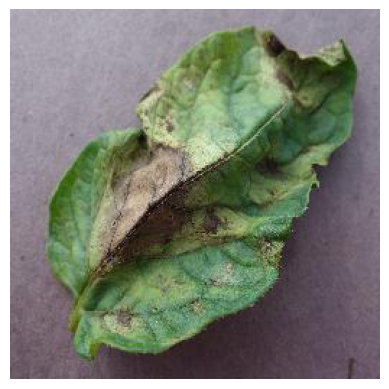

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Output: Potato___Late_blight


In [54]:
# Step 7: Make predictions on new images

# Output/predicion presentation 2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_image(image_path):
    # Load and display the test image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()

    # Preprocess the image for prediction
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array /= 255.0  # Normalize pixel values

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    
    # Define class labels
    class_labels = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

    # Print predicted output
    print("Predicted Output:", class_labels[predicted_class])

# Example usage:
image_path = r'C:\Users\1220\Downloads\Potato Disease Prediction Project\PlantVillage\Potato___Late_blight\1cffe6a1-6fb3-4506-846c-478148a2b678___RS_LB 4380.JPG'
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


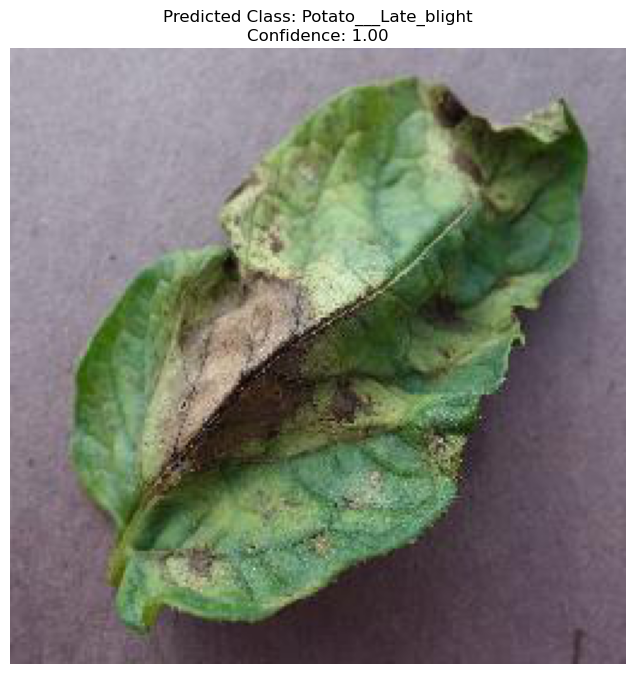

In [55]:
# Step 7: Make predictions on new images

# Output/predicion presentation 3


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def predict_image(image_path, model):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array /= 255.0  # Normalize pixel values

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence = predictions[0][predicted_class]

    # Map predicted class index to class label
    class_labels = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
    predicted_label = class_labels[predicted_class]

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')

    # Display predicted class and confidence
    plt.title(f'Predicted Class: {predicted_label}\nConfidence: {confidence:.2f}')
    plt.show()

# Example usage:
image_path = r'C:\Users\1220\Downloads\Potato Disease Prediction Project\PlantVillage\Potato___Late_blight\1cffe6a1-6fb3-4506-846c-478148a2b678___RS_LB 4380.JPG'
predict_image(image_path, model)


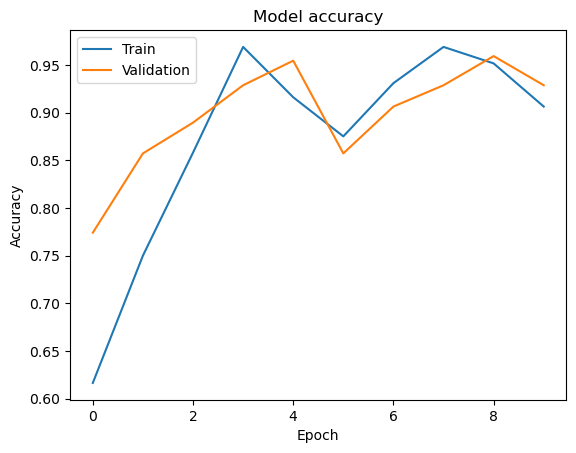

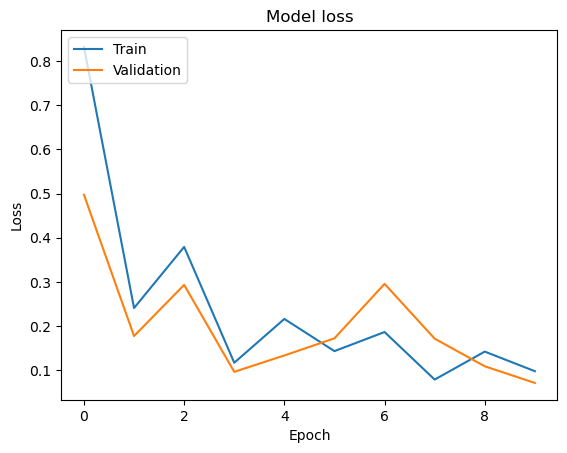

In [53]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Only When:
        # If model is not working or performing or overfitting or underfitting, then we uses L1 or L2 regularisation techniques 


from tensorflow.keras.regularizers import l1, l2

# Define regularization parameters
l1_value = 0.001  # adjust as needed
l2_value = 0.001  # adjust as needed

# Build the deep learning model with L1 and L2 regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3), kernel_regularizer=l2(l2_value), bias_regularizer=l2(l2_value)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2_value), bias_regularizer=l2(l2_value)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2_value), bias_regularizer=l2(l2_value)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2_value), bias_regularizer=l2(l2_value)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(l2_value), bias_regularizer=l2(l2_value)),
    Dense(3, activation='softmax')
])


In [57]:
train_generator.classes

array([0, 0, 0, ..., 2, 2, 2])